# Project description
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2017 sales based on data from 2016.)
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

# Instructions for completing the project
# Step 1. Open the data file and study the general information
File path:
/datasets/games.csv . Download dataset
#  Step 2. Prepare the data
Replace the column names (make them lowercase).
Convert the data to the required types.
Describe the columns where the data types have been changed and why.
If necessary, decide how to deal with missing values:
Explain why you filled in the missing values as you did or why you decided to leave them blank.
Why do you think the values are missing? Give possible reasons.
Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.
# Step 3. Analyze the data
Look at how many games were released in different years. Is the data for every period significant?
Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
Work only with the data that you've decided is relevant. Disregard the data for previous years.
Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
Keeping your conclusions in mind, compare the sales of the same games on other platforms.
Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?
# Step 4. Create a user profile for each region
For each region (NA, EU, JP), determine:
The top five platforms. Describe variations in their market shares from region to region.
The top five genres. Explain the difference.
Do ESRB ratings affect sales in individual regions?
# Step 5. Test the following hypotheses:

## Average user ratings of the Xbox One and PC platforms are the same.
## Average user ratings for the Action and Sports genres are different.
Set the alpha threshold value yourself.
Explain:
—How you formulated the null and alternative hypotheses
—What significance level you chose to test the hypotheses, and why
# Step 6. Write a general conclusion

# Step 1

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt
import seaborn as sns
import math
from functools import reduce
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [65]:
data =  pd.read_csv('/datasets/games.csv')

In [66]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [67]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [69]:
! pip install sidetable

In [70]:
import sidetable

In [71]:
data.stb.missing(style=True)

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


we see: 
 - column 'Name' - two missing values, change to small letters
 - Year_of_Release - missing values, also change to datetime
 - Genre - two missing values, can be compared to 'Name'
 - Critic_Score - many missing values, 
 - many missing values, we need to compare with the previous one for the same missing values. and change the type to 'float64'
 - a lot of missing and may need to categorize to replace. 
 

In [72]:
data = data.rename(
    columns={
        'Name': 'name',
        'Platform': 'platform',
        'Year_of_Release': 'year_of_release',
        'Genre' : 'genre',
        'NA_sales' : 'na_sales',
        'EU_sales' : 'eu_sales',
        'JP_sales' : 'jp_sales',
        'Other_sales' : 'other_sales',
        'Critic_Score' : 'critic_score',
        'User_Score' : 'user_score',
        'Rating' : 'rating'
        
    }
)


In [73]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


the 'name' column and the 'genre' column. check for a match and if so, delete them, there are only 2 rows. 

In [75]:
missing_data = data[(data['name'].isnull())&(data['genre'].isnull())]
missing_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


we see that in both columns there is a missing date in the same lines. there are only 2 of them, we can easily throw them out. 

In [76]:
data = data.drop (index=[ 659,14244 ])

In [77]:
missing_data = data[(data['name'].isnull())&(data['genre'].isnull())]
missing_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


was successfully removed 

In [78]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


***year of release***

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [80]:
data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [81]:
data['year_of_release'].isna().sum()


269

is only 2 percent of the date and you can get rid of the missing rows. 


In [82]:
data = data.dropna(subset=['year_of_release'])

In [83]:
data['year_of_release'].isna().sum()

0

In [84]:
data['year_of_release'] = data['year_of_release'].astype(int)


/tmp/ipykernel_26/2568179930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_release'] = data['year_of_release'].astype(int)


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


***RATING***

In [86]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [87]:
data['rating'].isna().sum()

6676

this is a lot of missing date, it is not quite clear what and how to do with it. on what principle we will change them is not clear, so we just replace it with 'unknown'

In [88]:
data['rating'] = data['rating'].fillna(value='unknown')

/tmp/ipykernel_26/2851457171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating'] = data['rating'].fillna(value='unknown')


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


***total sales***

In [90]:
data['total_sale'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data.head()

/tmp/ipykernel_26/1040775981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_sale'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


***critic\user score***

In [91]:
data.describe(include=['object'])

,name,platform,genre,user_score,rating
count,16444,16444,16444,9839,16444
unique,11426,31,12,96,9
top,Need for Speed: Most Wanted,PS2,Action,tbd,unknown
freq,12,2127,3307,2376,6676


In [92]:
data[data.user_score == 'tbd']['year_of_release'].value_counts()


2009    405
2010    331
2008    326
2011    217
2007    192
2002    192
2006    124
2005    121
2004    107
2003     95
2001     82
2000     43
2015     38
2016     34
2012     24
2014     21
2013     15
1999      8
1997      1
Name: year_of_release, dtype: int64

we see that the date has not been updated for a very long time. TDB is in all years, almost. I'm afraid we can't figure out what to replace TDB with, and we can't just delete it, so we"ll work with it. let's change it by NaN to work with it later

In [93]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [94]:
data['user_score'] = data['user_score'].replace(['tbd'], float('nan'))

/tmp/ipykernel_26/401435472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['user_score'] = data['user_score'].replace(['tbd'], float('nan'))


In [95]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
 11  total_sale       16444 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


In [97]:
data['user_score'] = data['user_score'].astype(float)

/tmp/ipykernel_26/1942774938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['user_score'] = data['user_score'].astype(float)


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sale       16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [99]:
data.stb.missing(style=True)

,missing,total,percent
user_score,"8,981","16,444",54.62%
critic_score,"8,461","16,444",51.45%
name,0,"16,444",0.00%
platform,0,"16,444",0.00%
year_of_release,0,"16,444",0.00%
genre,0,"16,444",0.00%
na_sales,0,"16,444",0.00%
eu_sales,0,"16,444",0.00%
jp_sales,0,"16,444",0.00%
other_sales,0,"16,444",0.00%


In [100]:
data.nlargest(5,['total_sale'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


there is a lot of missing data in columns 'critic_score' and 'user_score'. however we cann't fill it and we'll keep work with it. 

***Step 3. Analyze the data***
* Look at how many games were released in different years. Is the data for every period significant?

In [101]:
df=data[['year_of_release','name']].groupby(['year_of_release']).count().sort_values(by='year_of_release').reset_index()
df

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


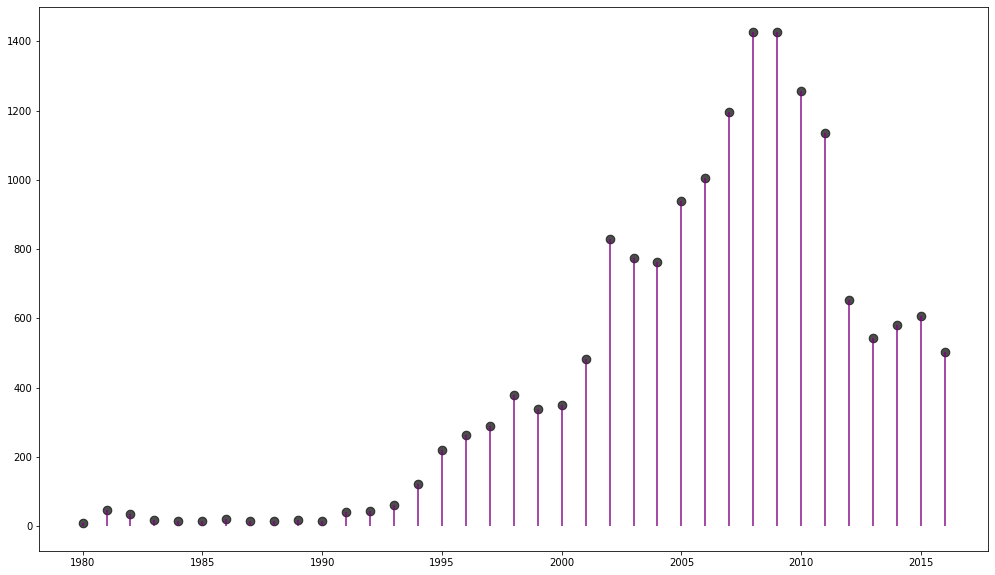

In [102]:
fig,ax=plt.subplots(figsize=(17,10))
ax.vlines(x=df.year_of_release, ymin=0, ymax=df.name, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=df.year_of_release,y=df.name, s=75, color='black',alpha=0.7)


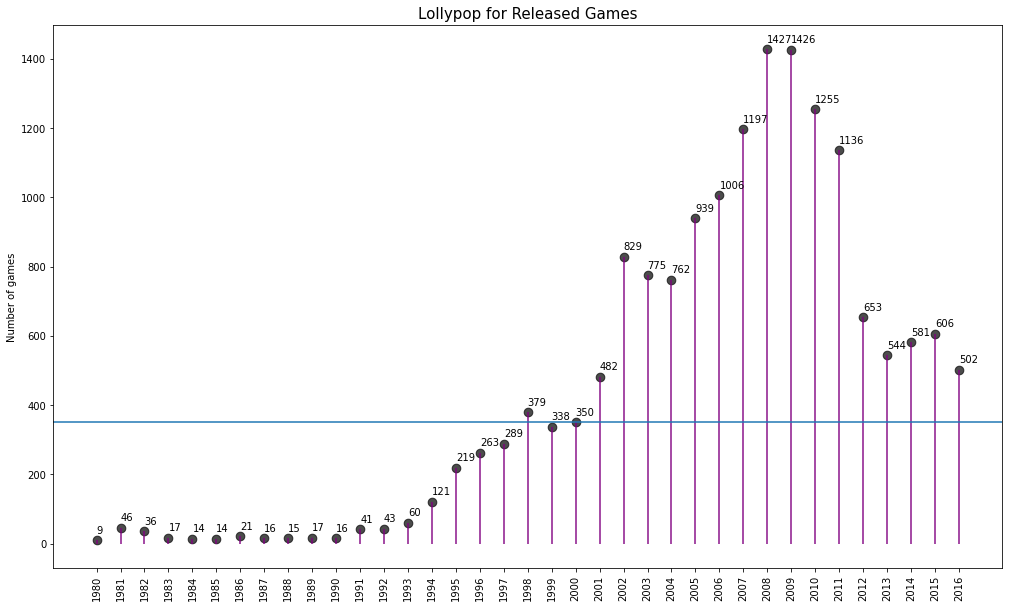

In [103]:
fig,ax=plt.subplots(figsize=(17,10))
ax.vlines(x=df.year_of_release, ymin=0, ymax=df.name, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=df.year_of_release,y=df.name, s=75, color='black',alpha=0.7)

ax.set_title("Lollypop for Released Games", fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xticks(df.year_of_release)
ax.set_xticklabels(df.year_of_release,rotation=90)
ax.axhline(y=350)

for row in df.itertuples():
    ax.text(row.year_of_release, row.name+20,s=row.name)

To answer the question posed, no, not all of the database is the same, and we will probably use the date from 2001 for our analysis. 

 * Look at how sales varied from platform to platform.
 * Choose the platforms with the greatest total sales and build a distribution based on data for each year. 


In [104]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [105]:
df=data[['platform','total_sale']].groupby(['platform']).sum().sort_values(by='total_sale').reset_index()
df

,platform,total_sale
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


In [106]:
df['sales_z']=(df['total_sale']-df['total_sale'].mean())/df['total_sale'].std()
df

,platform,total_sale,sales_z
0,PCFX,0.03,-0.826577
1,GG,0.04,-0.826548
2,3DO,0.10,-0.826373
3,TG16,0.16,-0.826199
4,WS,1.42,-0.822536
5,NG,1.44,-0.822477
6,SCD,1.86,-0.821256
7,DC,15.95,-0.780292
8,GEN,28.35,-0.744240
9,SAT,33.59,-0.729006


the most popular platform is - PS2

In [107]:
df['color']=['red' if x<0 else 'green' for x in df['sales_z']]
df

,platform,total_sale,sales_z,color
0,PCFX,0.03,-0.826577,red
1,GG,0.04,-0.826548,red
2,3DO,0.10,-0.826373,red
3,TG16,0.16,-0.826199,red
4,WS,1.42,-0.822536,red
5,NG,1.44,-0.822477,red
6,SCD,1.86,-0.821256,red
7,DC,15.95,-0.780292,red
8,GEN,28.35,-0.744240,red
9,SAT,33.59,-0.729006,red


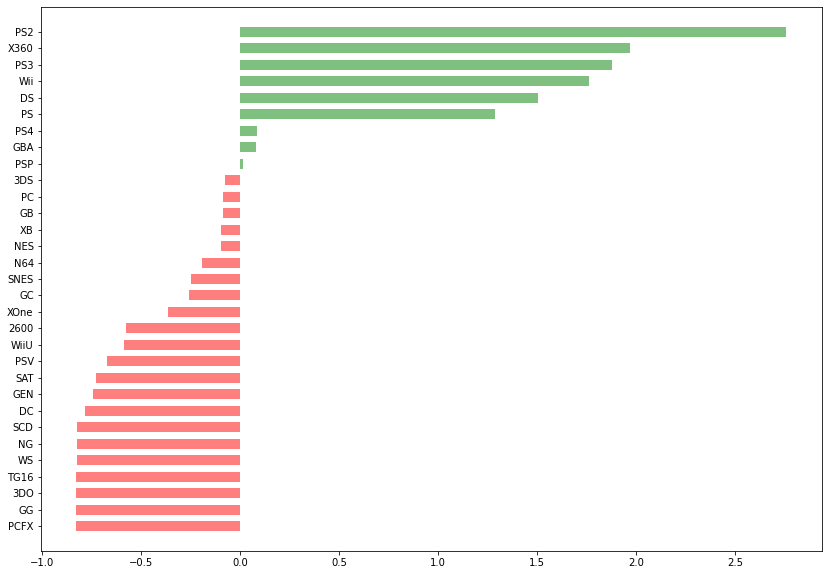

In [108]:
plt.figure(figsize=(14,10))
plt.hlines(y=df.platform,xmax=df.sales_z, xmin=0,color=df.color, alpha=0.5, linewidth=10)

the best-selling platform of all time is the PS2

***Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?***

In [109]:
df=data[data.year_of_release>=2001]

cut off since 2001, you can see that from Lolipop, only after 2001 did sales become more or less constant. 

In [110]:
df=df.groupby(['platform','year_of_release'])['total_sale'].sum().reset_index().sort_values(by='year_of_release')
df

,platform,year_of_release,total_sale
56,PS2,2001,166.43
53,PS,2001,35.59
21,GBA,2001,61.53
20,GB,2001,9.24
129,XB,2001,22.26
...,...,...,...
111,Wii,2016,0.18
5,3DS,2016,15.14
77,PS3,2016,3.60
99,PSV,2016,4.25


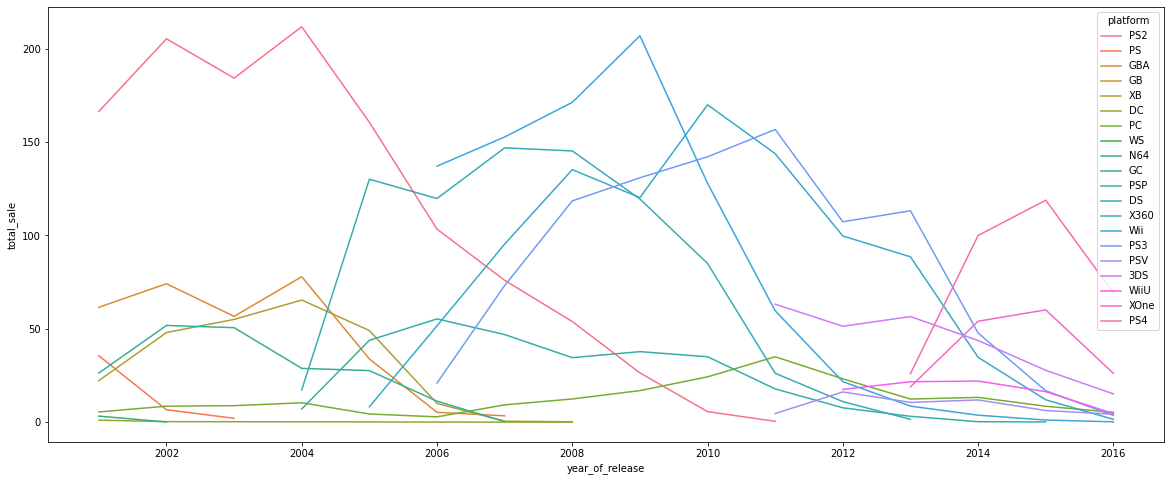

In [111]:
df=df.groupby(['platform','year_of_release'])['total_sale'].sum().reset_index().sort_values(by='year_of_release')

plt.figure(figsize=(20,8))
ax = sns.lineplot(data=df, x="year_of_release", y="total_sale",hue="platform")

From the graph we can see that basically the life cycle of the platform, for example PS2 in 2004 was at the peak of sales, but after 6-7 years its sales went to zero. thus, on the example of a successful platform we see that sales grow about 2 years remain at the peak, then, with the advent of new platforms sales fall and stop after 4-6 years. 
Let's also consider the wii - the start of sales in 2005, 2009 sales peak, it took 4 years to get to the peak, from 2009 to 2012 a sharp drop in three years, and zero sales by 2016. 
It is interesting that modern models live their century faster. e.g. PS4? we see that very quickly since its introduction it reached its peak sales (2013-appearance, 2014 peak), two years on peak and decline. 

* Determine what period you should take data for. To do so, look at your answers to the previous questions. The key criterion is that the data should allow you to build a prognosis for 2017.

carefully consider the previous graph. we see that a lot of platforms have been released since 2000, but only a few have survived to this day (2016). based on the graph, we will take only the date, after 2014. since 2014 we see modern platforms, but still present in the market old and successful platforms (PS2 and X360).

In [112]:
data_new=data[data.year_of_release>=2014]
data_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


* Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

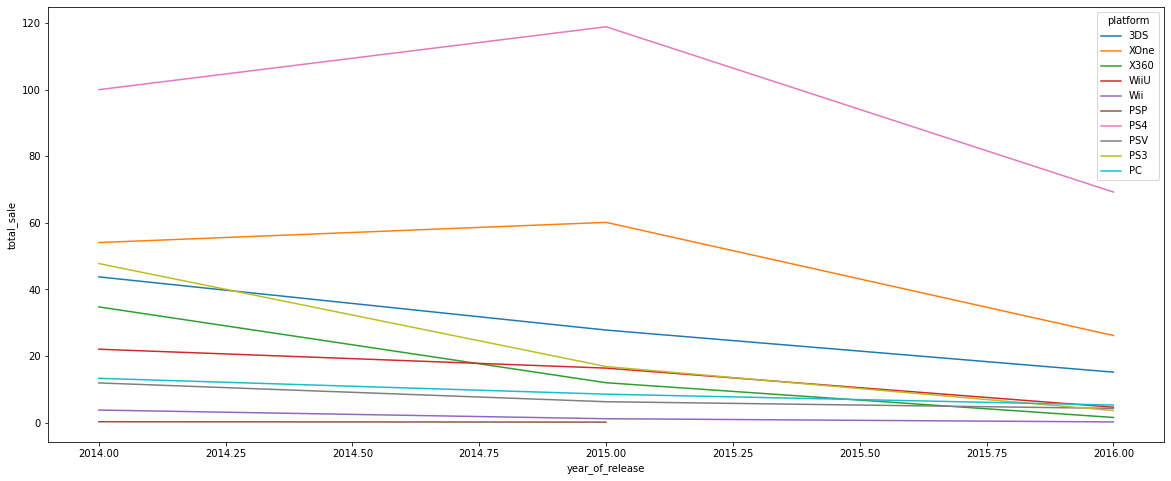

In [113]:
data_new_1 = data_new.groupby(['platform','year_of_release'])['total_sale'].sum().reset_index().sort_values(by='year_of_release')

plt.figure(figsize=(20,8))
ax = sns.lineplot(data=data_new_1, x="year_of_release", y="total_sale",hue="platform")

Based on this graph and the previous ones we can say the following:
- PS4 b XOne platform lead in sales and will lead in 2017. 
- They peaked in sales by 2014, by 2015 the decline began, but if we trust the behavior of sales from previous platforms, we see that there are 3-4 years until sales will fall completely, especially since there are no new players in the market, no other platform is growing and apparently there will be no competition. 

Another way to check

In [114]:
df=pd.pivot_table(data_new_1,index='year_of_release',columns='platform',values='total_sale',aggfunc='sum',fill_value=0)
df

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [115]:
df.shift(+1)


platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,43.76,13.28,47.76,100.0,0.24,11.90,3.75,22.03,34.74,54.07
2016,27.78,8.52,16.82,118.9,0.12,6.25,1.14,16.35,11.96,60.14


In [116]:
df-df.shift(+1)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,-15.98,-4.76,-30.94,18.90,-0.12,-5.65,-2.61,-5.68,-22.78,6.07
2016,-12.64,-3.27,-13.22,-49.65,-0.12,-2.00,-0.96,-11.75,-10.44,-33.99


In [117]:
dynamics=(df-df.shift(+1)).T
dynamics

year_of_release,2014,2015,2016
platform,,,
3DS,NaN,-15.98,-12.64
PC,NaN,-4.76,-3.27
PS3,NaN,-30.94,-13.22
PS4,NaN,18.90,-49.65
PSP,NaN,-0.12,-0.12
PSV,NaN,-5.65,-2.00
Wii,NaN,-2.61,-0.96
WiiU,NaN,-5.68,-11.75
X360,NaN,-22.78,-10.44


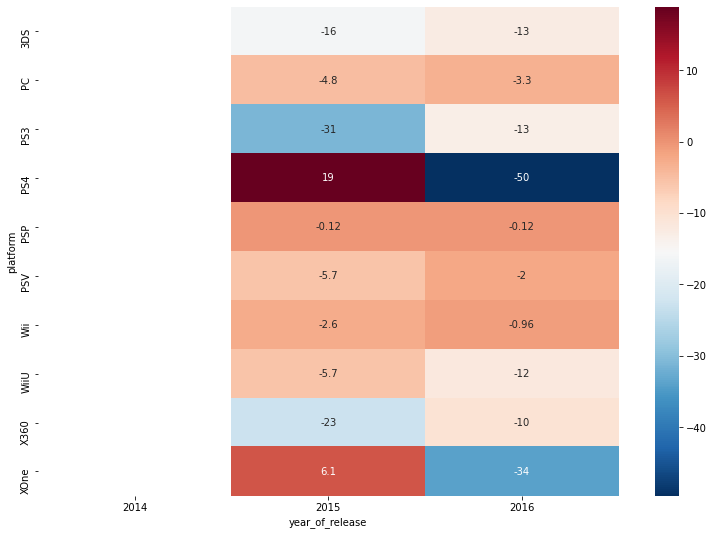

In [118]:
plt.figure(figsize=(13,9))
sns.heatmap(dynamics, cmap='RdBu_r', annot=True);

What we see here:
- 2016 is not over, so we will focus on 2015. 
- For 2015 we have two growing platforms: XOne and PS4. we will focus our analysis on them. 

***Build a box plot for the global sales of each game, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.***

In [119]:
grouped=data_new.groupby(['platform','name'])['total_sale'].sum().reset_index()
grouped

,platform,name,total_sale
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Haikyu!! Cross Team Match!,0.04
3,3DS,12-Sai. Honto no Kimochi,0.07
4,3DS,12-Sai. Koisuru Diary,0.05
...,...,...,...
1684,XOne,Wolfenstein: The Old Blood,0.15
1685,XOne,Worms: WMD,0.01
1686,XOne,XCOM 2,0.04
1687,XOne,ZombiU,0.01


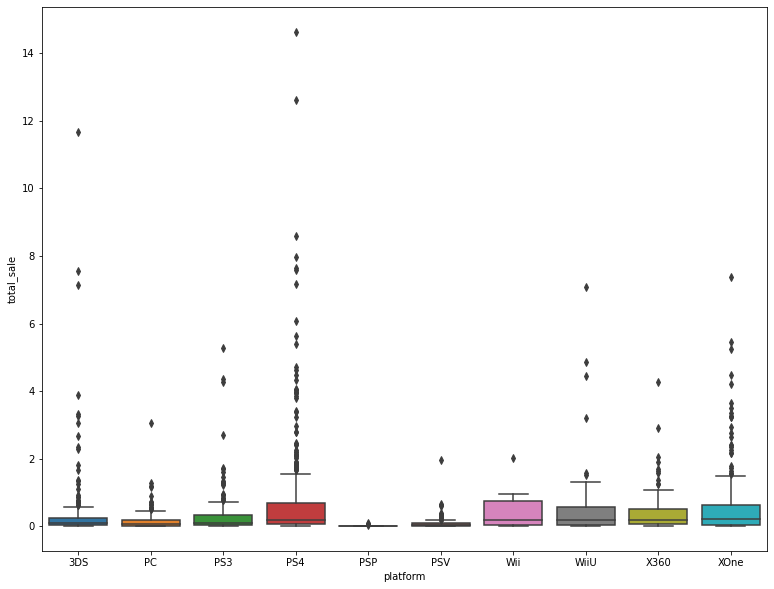

In [120]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='total_sale',data=grouped);

remove outliers with showfliers

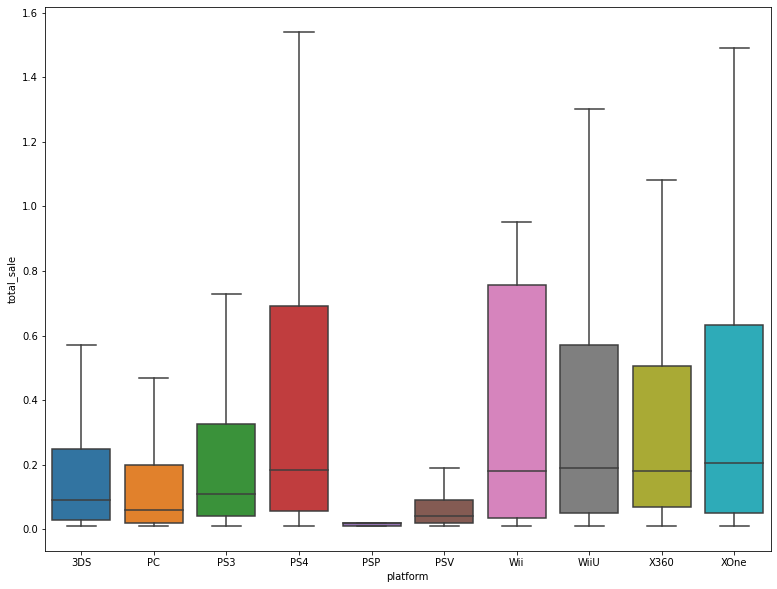

In [121]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='total_sale',data=grouped,showfliers = False);

In [122]:
order=grouped.groupby(['platform'])['total_sale'].sum().reset_index().sort_values(by='total_sale')['platform']
order

4     PSP
6     Wii
5     PSV
1      PC
7    WiiU
8    X360
2     PS3
0     3DS
9    XOne
3     PS4
Name: platform, dtype: object

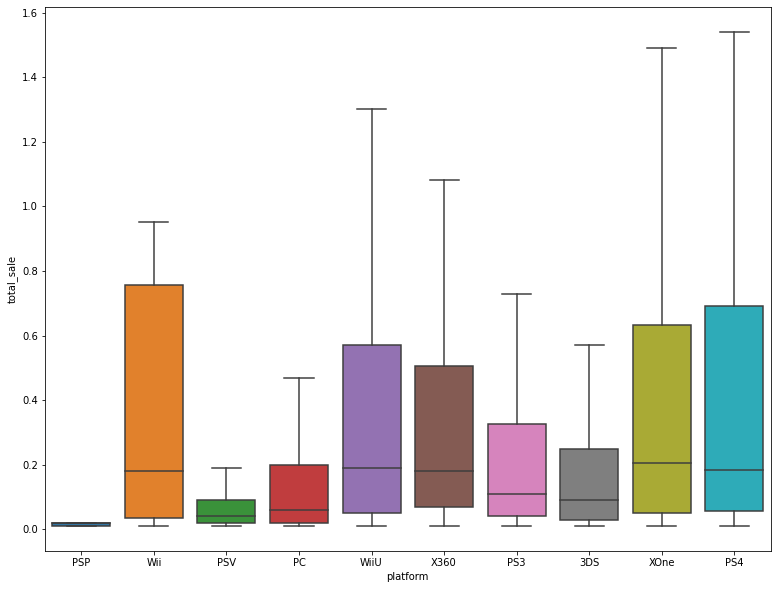

In [123]:
plt.figure(figsize=(13,10))
sns.boxplot(x = 'platform',y ='total_sale',data = grouped, order = order, showfliers = False);

we see quite similar behavior between XOne and PS4. their averages are almost the same, there is a lot of potential in the form of top wiskers. At the same time PS3 AND X360 are also very similar between them both in terms of average value and the rest of the distribution, their bottoms are even slightly higher than the first pair. However, knowing from the previous paragraphs that the second pair is almost no longer available, I still recommend focusing on games for PS4 and XOne

In [124]:
data_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98



**Taking a look at how user and professional reviews affect sales for one popular platform (PS4). Building a scatter plot and calculating the correlation between reviews and sales.**

<div class="alert alert-block alert-info">
<b>i tryed to bild function for this but i have sjme error that i don't know how to fix it. So i"ll do it manualy and if u can expalain me were my mistake is? </b> <a class="tocSkip"></a>

In [125]:
def score_effect(platform,score_type):
    data_corr = data_new[(data_new['platform'] == platform) & (data_new[score_type].notna())][['total_sale',score_type]]
    data_corr.reset_index().sort_values(by = score_type)
    data_corr.plot(x = score_type,y = 'total_sale',kind = 'scatter',figsize = (10,10));
    correlation = data_corr[['total_sale',score_type]].corr()
    return correlation
    
    

,total_sale,critic_score
total_sale,1.000000,0.402661
critic_score,0.402661,1.000000


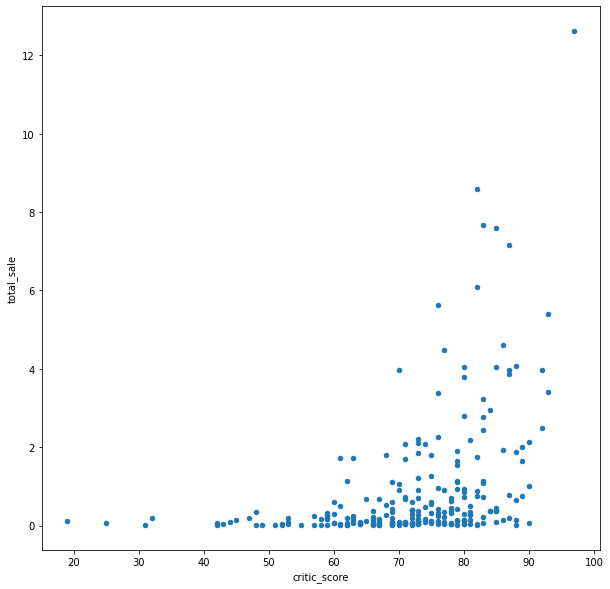

In [126]:
score_effect('PS4','critic_score')

,total_sale,user_score
total_sale,1.000000,-0.040132
user_score,-0.040132,1.000000


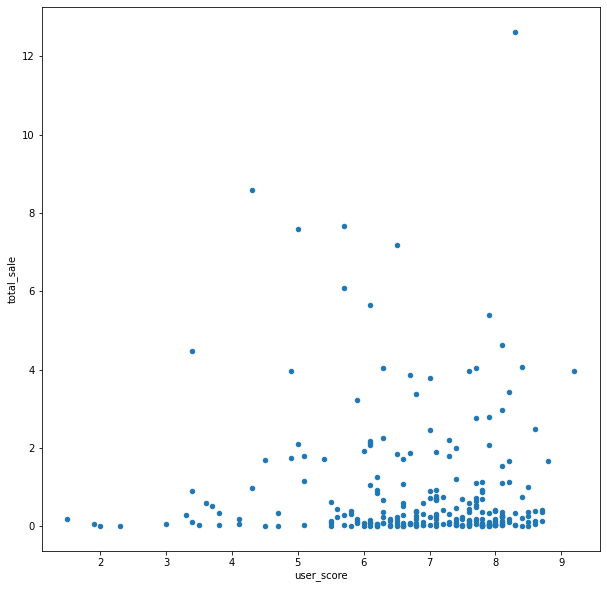

In [127]:
score_effect('PS4','user_score')

,total_sale,critic_score
total_sale,NaN,NaN
critic_score,NaN,NaN


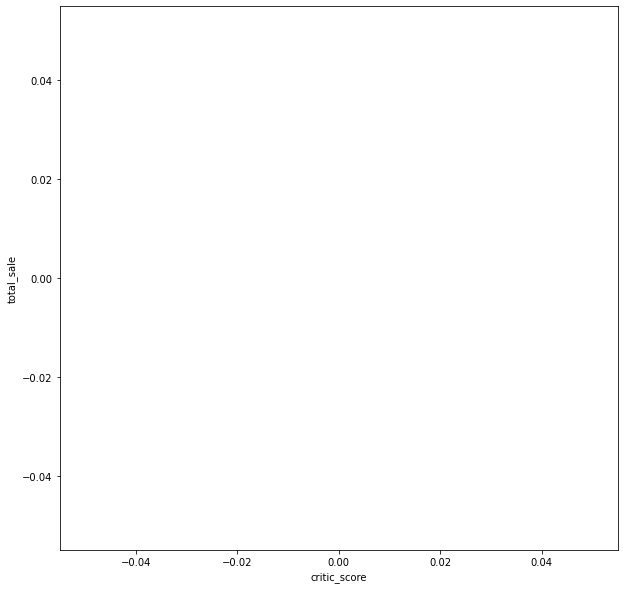

In [128]:
score_effect('Wii','critic_score')

,total_sale,user_score
total_sale,1.0,1.0
user_score,1.0,1.0


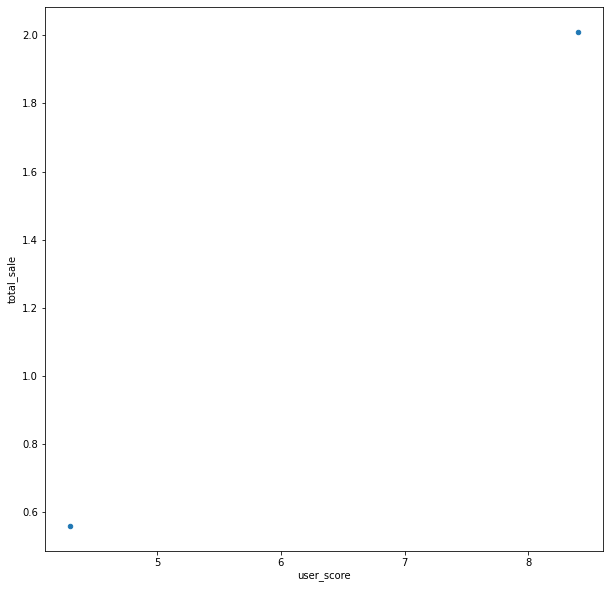

In [129]:
score_effect('Wii','user_score')

,total_sale,critic_score
total_sale,1.000000,0.428677
critic_score,0.428677,1.000000


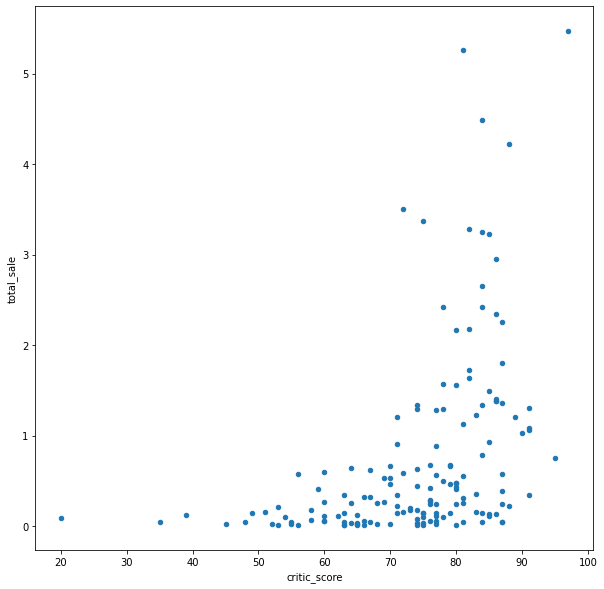

In [130]:
score_effect('XOne','critic_score')

,total_sale,user_score
total_sale,1.000000,-0.070384
user_score,-0.070384,1.000000


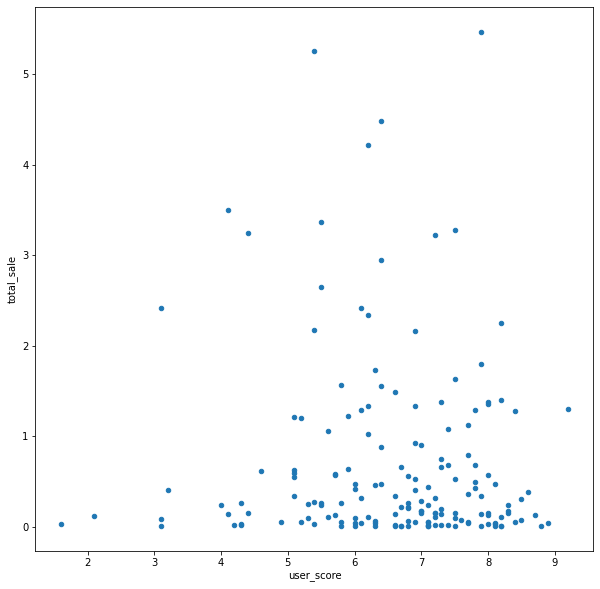

In [131]:
score_effect('XOne','user_score')

,total_sale,critic_score
total_sale,1.000000,0.525723
critic_score,0.525723,1.000000


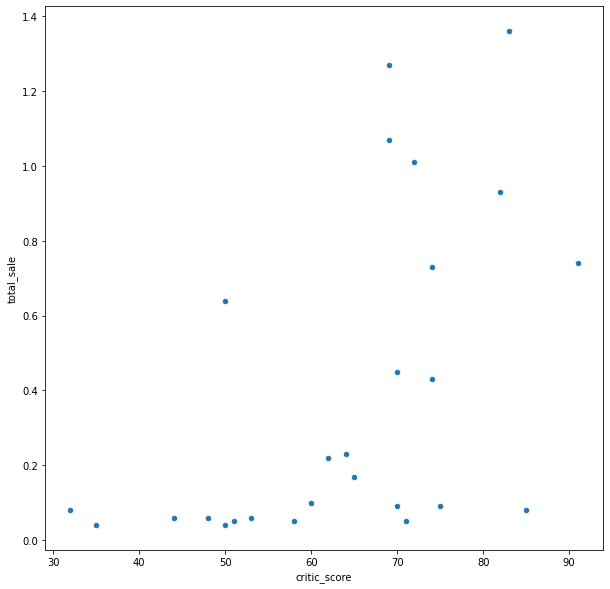

In [132]:
score_effect('X360','critic_score')

,total_sale,user_score
total_sale,1.000000,-0.138445
user_score,-0.138445,1.000000


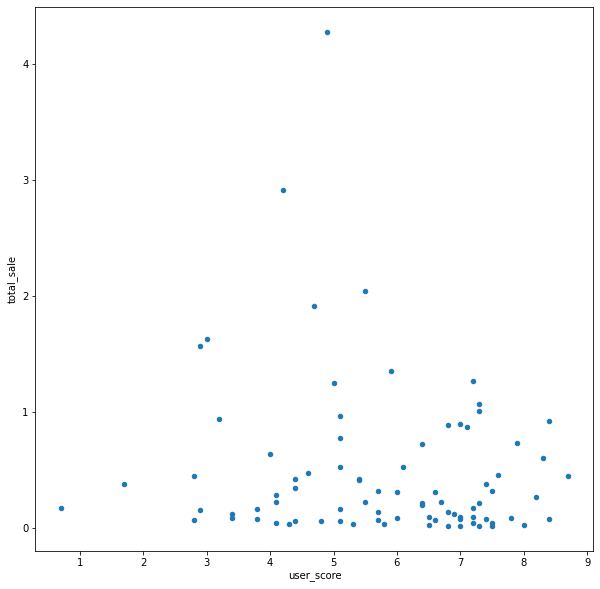

In [133]:
score_effect('X360','user_score')

,total_sale,critic_score
total_sale,1.000000,0.370201
critic_score,0.370201,1.000000


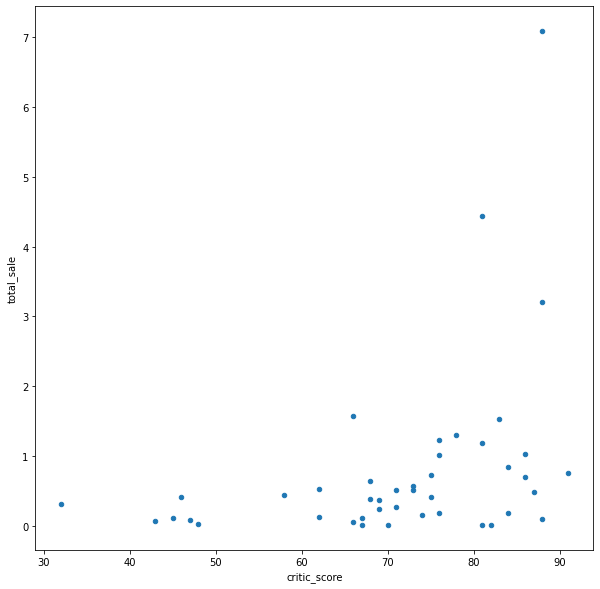

In [134]:
score_effect('WiiU','critic_score')

,total_sale,user_score
total_sale,1.000000,0.407926
user_score,0.407926,1.000000


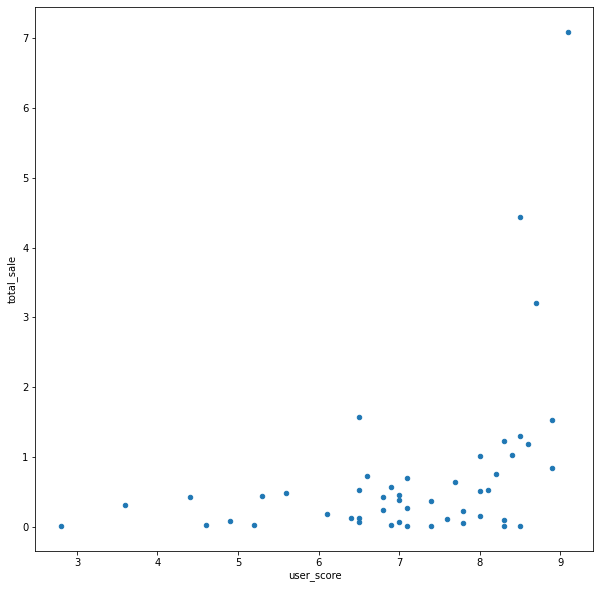

In [135]:
score_effect('WiiU','user_score')

1. in the case of the PS4, there is very little correlation between sales and the comments of critics and users. Let's see what happens with the other top 5 platforms. 
2. we see that in the cases of XOne, WiiU and X360 - there is a very weak correlation, and in the case of X360 and user comments there is a weak negative correlation. But in all these cases the correlation is weak and we can say that there is no connection between sales and comments. 
3. In the case of the Wii, we see that there are only two cases of user comments on this platform, and the correlation is strong between them, but there is no correlation between the sales of the Wii and the comments of the users. 
4. the general conclusion of this part is that there is no apparent correlation between sales and the comments of critics and users


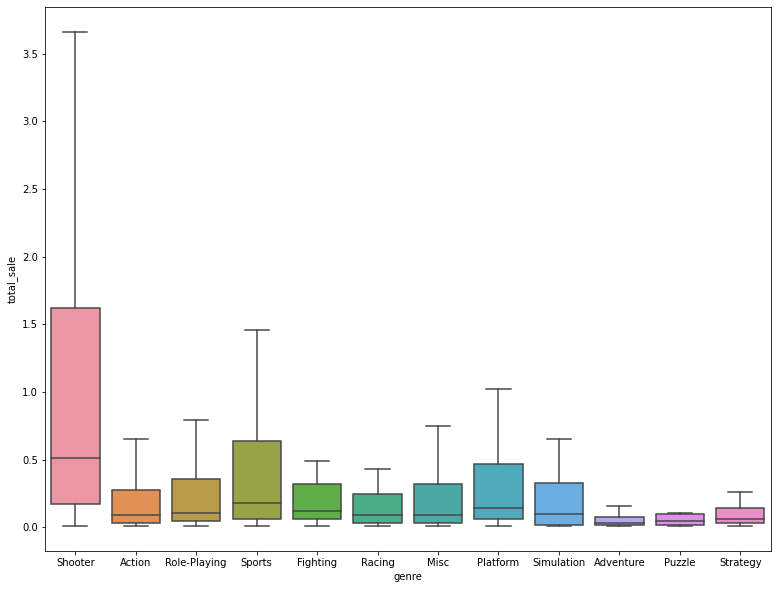

In [136]:
plt.figure(figsize=(13,10))
sns.boxplot(x = 'genre',y ='total_sale',data = data_new, showfliers = False);

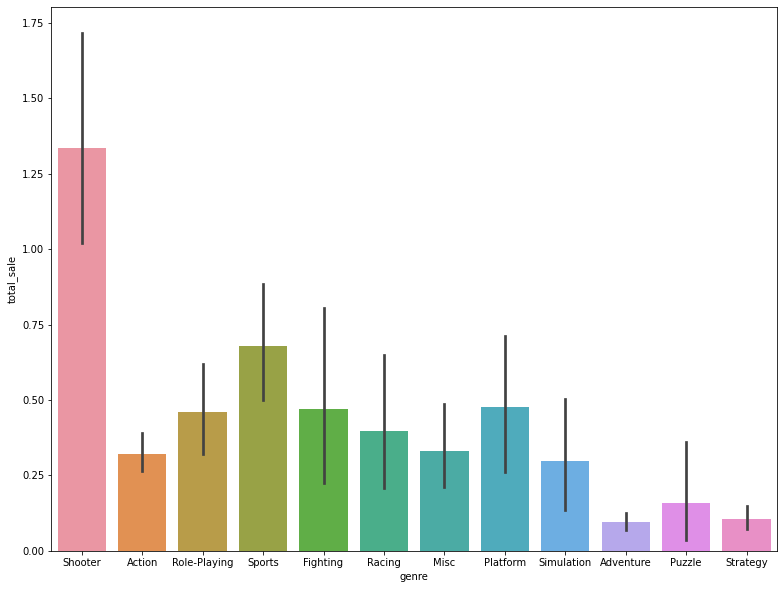

In [137]:
plt.figure(figsize=(13,10))
sns.barplot(x = 'genre',y = 'total_sale', data = data_new);

We also see from the charts that the most popular genre of games is a shooter, which is understandable

# Step 4. Create a user profile for each region
For each region (NA, EU, JP), determine:

The top five platforms. Describe variations in their market shares from region to region.

The top five genres. 

Explain the difference.

Do ESRB ratings affect sales in individual regions?

In [138]:
north_america = data_new.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
north_america

,platform,na_sales
3,PS4,98.61
9,XOne,81.27
8,X360,28.30
0,3DS,22.64
2,PS3,22.05


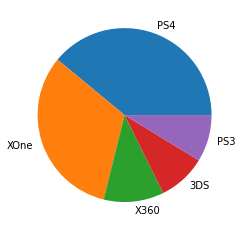

In [139]:
arr_na = north_america.na_sales.head()
na_labels = north_america.platform.head()
plt.pie(arr_na,labels = na_labels);

In [140]:
europe = data_new.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
europe

,platform,eu_sales
3,PS4,130.04
9,XOne,46.25
2,PS3,25.54
1,PC,17.97
0,3DS,16.12


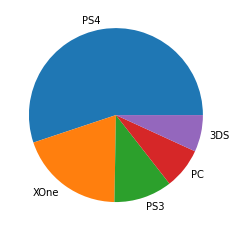

In [141]:
arr = europe.eu_sales.head()
labels = europe.platform.head()
plt.pie(arr,labels = labels);

In [142]:
japan = data_new.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
japan

,platform,jp_sales
0,3DS,44.24
3,PS4,15.02
5,PSV,14.54
2,PS3,11.22
7,WiiU,7.31


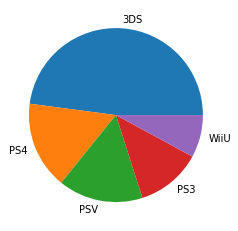

In [143]:
arr = japan.jp_sales.head()
labels = japan.platform.head()
plt.pie(arr,labels = labels);

- sales in America are almost twice as high as in Europe, and several times higher than in Japan
- the top three in America and Europe are the same platforms (PS3, X360, Wiii), in Japan it is a little different, here X360 and PS4 are not in the top 5 at all

In [144]:
japan = data_new.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
japan

,genre,jp_sales
7,Role-Playing,31.16
0,Action,29.58
2,Fighting,6.37
3,Misc,5.61
8,Shooter,4.87


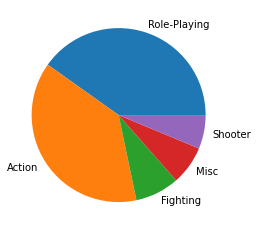

In [145]:
arr = japan.jp_sales.head()
labels = japan.genre.head()
plt.pie(arr,labels = labels);

In [146]:
europe = data_new.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
europe

,genre,eu_sales
0,Action,74.68
8,Shooter,65.52
10,Sports,45.73
7,Role-Playing,28.17
6,Racing,14.13


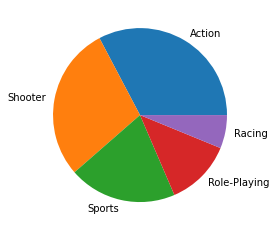

In [147]:
arr = europe.eu_sales.head()
labels = europe.genre.head()
plt.pie(arr,labels = labels);

In [148]:
n_a = data_new.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
n_a

,genre,na_sales
8,Shooter,79.02
0,Action,72.53
10,Sports,46.13
7,Role-Playing,33.47
3,Misc,15.05


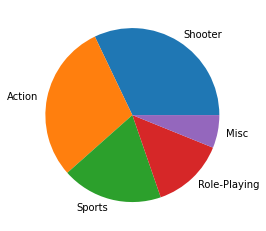

In [149]:
arr = n_a.na_sales.head()
labels = n_a.genre.head()
plt.pie(arr,labels = labels);

Again we see similar behavior between America and Europe, and very different behavior from Japan. 

In [150]:
na= data.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
na

,rating,na_sales
1,E,1274.24
8,unknown,1225.84
7,T,747.60
5,M,742.89
2,E10+,345.50


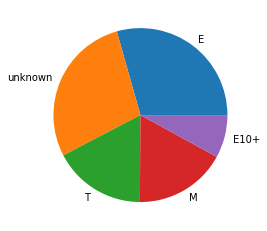

In [151]:
arr = na.na_sales.head()
labels = na.rating.head()
plt.pie(arr,labels = labels);

In [152]:
eu = data.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu

,rating,eu_sales
1,E,703.87
8,unknown,609.65
5,M,480.00
7,T,421.79
2,E10+,183.35


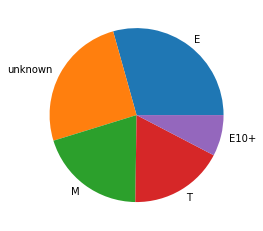

In [153]:
arr = eu.eu_sales.head()
labels = eu.rating.head()
plt.pie(arr,labels = labels);

In [154]:
jp = data.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp

,rating,jp_sales
8,unknown,836.74
1,E,197.96
7,T,150.70
5,M,63.58
2,E10+,40.20


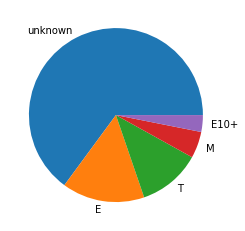

In [155]:
arr = jp.jp_sales.head()
labels = jp.rating.head()
plt.pie(arr,labels = labels);

- In the case of the rating there is absolute consistency in the behavior of Europe and America, and slightly different Japan.
- the unknown (that was missed), is at the very bottom with almost 0 sales, we can conclude that in all three aeres it is very important to have a rating of E, M, T 

# Step 5
***STATISTICAL TEST***

Now we will use statistical tests to test the feasibility of two hypotheses that we have already listed.

 **Notice:** I mention that in statistical experiments we can never know 100 percent if we are right, all we can say about the hypothesis is whether we have enough information to reject our hypothesis or not.

* **First hypothesis:** Average user ratings of the Xbox One and PC platforms are the same.
We will define this hypothesis as the null hypothesis. and for the second hypothesis (if the averages between the platforms are different) the H1 hypothesis.


* **Second hypothesis:** Average user ratings for the Action and Sports genres are different.
We will define this hypothesis as the null hypothesis. and for the second hypothesis (if the averages between the platforms are different) the H1 hypothesis.

tha alpha value wiil set to 0.5

In [156]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sale'],
      dtype='object')

**First hypothesis:**

In [160]:
xb = data[(data.platform=='XB')&(data.user_score.notna())]['user_score'].astype(float)

In [161]:
xb

78       8.2
129      8.6
466      8.5
508      8.7
569      8.5
        ... 
15989    8.7
16037    6.0
16194    7.3
16203    3.0
16455    7.0
Name: user_score, Length: 571, dtype: float64

In [162]:
xb.unique()

array([8.2, 8.6, 8.5, 8.7, 9.2, 6.7, 6.1, 9.1, 7.6, 8.9, 6.9, 7.5, 7.8,
       7.4, 7.2, 8.1, 8.8, 8.3, 7.1, 5.8, 8. , 5.1, 9. , 8.4, 7.9, 6.4,
       4.7, 5.9, 7.7, 5.7, 5.2, 7.3, 6.6, 7. , 6.5, 9.3, 5.4, 6. , 2.4,
       4.4, 6.2, 4.3, 5.3, 6.8, 2.8, 5.5, 6.3, 5. , 3. , 2. , 4.1, 4. ,
       5.6, 3.6, 0.5, 4.6, 3.4, 2.5, 1.5, 2.7, 1.2, 3.7, 4.5, 4.8])

In [163]:
pc=data[(data.platform=='PC')&(data.user_score.notna())]['user_score'].astype(float)
pc

85       7.6
138      7.3
192      4.0
218      8.2
284      9.1
        ... 
16681    8.1
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 755, dtype: float64

In [164]:
from scipy.stats import levene
stat, p = levene(xb, pc)
p<0.05

True

In [165]:
from scipy import stats
stats.ttest_ind(xb, pc,equal_var=True)

Ttest_indResult(statistic=5.5047335808438165, pvalue=4.435048034276628e-08)

In [166]:
stats.ttest_ind(xb, pc).pvalue

4.435048034276628e-08

In [167]:
stats.ttest_ind(xb, pc).pvalue<0.05

True

We reject the null hypothesis.

**Second hypothesis:**

In [168]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [169]:
action = data[(data.genre=='Action')&(data.user_score.notna())]['user_score'].astype(float)

In [170]:
action.head()

16    8.2
17    9.0
23    8.1
24    8.7
38    8.5
Name: user_score, dtype: float64

In [171]:
sport = data[(data.genre=='Sports')&(data.user_score.notna())]['user_score'].astype(float)

In [172]:
sport.head()

0     8.0
3     8.0
13    7.7
15    7.4
77    4.3
Name: user_score, dtype: float64

In [173]:
from scipy.stats import levene
stat, p = levene(action, sport)
p<0.05

True

In [174]:
from scipy import stats
stats.ttest_ind(action, sport,equal_var=True)

Ttest_indResult(statistic=1.8472797735322193, pvalue=0.06480928064420527)

In [175]:
stats.ttest_ind(xb, pc).pvalue

4.435048034276628e-08

In [176]:
stats.ttest_ind(xb, pc).pvalue<0.05

True

 We don't have enough information to reject the null hyphotesis.

**another way to chek**

In [177]:
def t_test(sample1,sample2,alpha=0.05):
    p_value=stats.ttest_ind(sample1, sample2,nan_policy='omit').pvalue.astype(int)
    if p_value<alpha:
        print('Reject Ho: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to Reject Ho: We don't have enough evidence to say that averages of sample 1 \
  and sample 2 are not the same")

In [178]:
t_test(xb,pc,alpha=0.05)

Reject Ho: average of sample 1 is not equal to average of sample 2


In [179]:
t_test(action,sport,alpha=0.05)

Reject Ho: average of sample 1 is not equal to average of sample 2


# we reject the first hypothesis
- user ratings of the Xbox One and PC platforms are not the same 


# we reject the second hypothesis
- user ratings of the Action and Sports genres are not the same 


# GENERAL CONCLUSION

1. While working on the data, it turned out that the user_score column has a lot of 'Tdb' data that hasn't been corrected in years. it might be worth offering some kind of bonus to users so that they fill in the data to the end. 
2. A tangible number of games only started to appear after 2001. This is the time period we took for the initial analysis. 
3. The best-selling platform over the years is the PS2, but in 2017 it is not selling at all. 
4. the lifetime of the platform:
  - 2-3 years from release to peak sales
  - up to 2 years of peak sales
  - 4-6 years from peak to zero sales
5. The sales leaders for 2015 (2016 is not over yet and there is no complete picture) are: 
   - PS4
   - Xbox One
   A slight decline is expected in 2017, but as long as there are no competitors, it is necessary to develop these two areas. 
6. We built boxplots and once again made sure our choice was the right one. See for yourself by scrolling up. 

7. Looking at the correlation between comments and sales we saw:
   - weak correlation between the critic_score and sales
   - a weak negative correlation between user_score and sales, perhaps you should pay attention to this point after all. 
8. We looked at several factors in three geographic areas: Japan, North America, and Europe and found:
   - The sales in America are twice as much as in Europe and several times more than in Japan. It is necessary to develop the        European and especially Japanese markets. 
   - In japan a bit different platforms are popular than in america and europe, it should be kept in mind
   - Genre preferences are similar in America and Europe, but very different in Japan. Don't forget that when developing            Japanese markets
   - Ratings in America and Europe are exactly the same, in Japan a little different, but what is certain for all, it is            important that the rating is at the level of E, M or T
   